In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

Analyzing historical quiz data by extracting useful information

In [2]:
hist = requests.get("https://api.jsonserve.com/XgAgFJ")

In [3]:
# Extracting the required fields
required_columns = [
    "quiz_id", "score", "trophy_level", "accuracy", "speed", "final_score",
    "negative_score", "correct_answers", "incorrect_answers", "better_than",
    "total_questions", "rank_text", "mistakes_corrected", "initial_mistake_count",
    "quiz.title", "quiz.topic","quiz.difficulty_level"
]

In [4]:
df_hist = pd.json_normalize(hist.json())[required_columns]

# Renaming columns for better readability (optional)
df_hist.rename(columns={'quiz.title': 'title', 'quiz.topic': 'topic','quiz.difficulty':'difficulty'}, inplace=True)

# Display the DataFrame
print(df_hist.head())
print(df_hist.shape)

   quiz_id  score  trophy_level accuracy speed final_score negative_score  \
0       51    108             2     90 %   100       105.0            3.0   
1        6     92             1    100 %   100        92.0            0.0   
2       51    116             2     96 %   100       115.0            1.0   
3        6     36             2     90 %   100        35.0            1.0   
4       51     36             3     31 %    96        16.0           20.0   

   correct_answers  incorrect_answers  better_than  total_questions  \
0               27                  3          107              100   
1               23                  0          395               23   
2               29                  1          115              100   
3                9                  1          152               23   
4                9                 20           35              100   

             rank_text  mistakes_corrected  initial_mistake_count  \
0   Topic Rank - #-171                   

Extracting data from Quizz Submission Data

In [5]:
quiz_sub = requests.get("https://api.jsonserve.com/rJvd7g")

In [6]:
df_quiz_sub = pd.json_normalize(quiz_sub.json())[required_columns]

# Renaming columns for better readability (optional)
df_quiz_sub.rename(columns={'quiz.title': 'title', 'quiz.topic': 'topic'}, inplace=True)

In [7]:
# Display the DataFrame
print(df_quiz_sub)
print(df_quiz_sub.shape)

   quiz_id  score  trophy_level accuracy speed final_score negative_score  \
0       43     32             2     80 %   100        30.0            2.0   

   correct_answers  incorrect_answers  better_than  total_questions  \
0                8                  2           24              128   

            rank_text  mistakes_corrected  initial_mistake_count  \
0  Topic Rank - #2402                   6                      8   

                                               title  \
0  Structural Organisation in Animals and Plants (7)   

                                topic quiz.difficulty_level  
0  Structural Organisation in Animals                  None  
(1, 17)


In [8]:
#Present and Past performance of the student 
result_df = pd.concat([df_hist,df_quiz_sub],ignore_index=True)
result_df['accuracy'] = result_df['accuracy'].str.replace('%', '').astype(float) / 100
result_df['rank'] = result_df['rank_text'].str.extract(r'#-?(\d+)').astype(int)
print(result_df.head())

   quiz_id  score  trophy_level  accuracy speed final_score negative_score  \
0       51    108             2      0.90   100       105.0            3.0   
1        6     92             1      1.00   100        92.0            0.0   
2       51    116             2      0.96   100       115.0            1.0   
3        6     36             2      0.90   100        35.0            1.0   
4       51     36             3      0.31    96        16.0           20.0   

   correct_answers  incorrect_answers  better_than  total_questions  \
0               27                  3          107              100   
1               23                  0          395               23   
2               29                  1          115              100   
3                9                  1          152               23   
4                9                 20           35              100   

             rank_text  mistakes_corrected  initial_mistake_count  \
0   Topic Rank - #-171             

In [9]:
#Present and Past performance of the student 
result_df = pd.concat([df_hist,df_quiz_sub],ignore_index=True)
result_df['accuracy'] = result_df['accuracy'].str.replace('%', '').astype(float) / 100
result_df['rank'] = result_df['rank_text'].str.extract(r'#-?(\d+)').astype(int)
print(result_df.head())

   quiz_id  score  trophy_level  accuracy speed final_score negative_score  \
0       51    108             2      0.90   100       105.0            3.0   
1        6     92             1      1.00   100        92.0            0.0   
2       51    116             2      0.96   100       115.0            1.0   
3        6     36             2      0.90   100        35.0            1.0   
4       51     36             3      0.31    96        16.0           20.0   

   correct_answers  incorrect_answers  better_than  total_questions  \
0               27                  3          107              100   
1               23                  0          395               23   
2               29                  1          115              100   
3                9                  1          152               23   
4                9                 20           35              100   

             rank_text  mistakes_corrected  initial_mistake_count  \
0   Topic Rank - #-171             

In [10]:
result_df = result_df.drop(columns = ["rank_text"])

Approach

1. Metric improvement = mistakes_corrected/initial_mistake_count tells how well student improved from the quiz.
2. If trophy_level is assumed as difficulty level then the metric accuray tells how well he is doing , based on the difficulty level. 
3. Topic wise accuracy is analysed irrespective of difficulty level. Topic wise metric improvement metric is analysed whether the performer is benefitting from the quiz retake.
4. As the data is very less. The metric initial_perf=((total_questions-initial_mistakes_count)/ total_questions_attempted) will be a useful metric.
5. The metric initial_perf is analysed based on the difficulty level and topic wise to draw insights.
6. Normailizing the title "Human Physiology (15)" and "Human Physiology PYQ" as the same and titled as Human Physiology.

In [11]:
#Required data from the above table
required_cols = ["quiz_id","final_score","trophy_level","accuracy","correct_answers","incorrect_answers",
                 "mistakes_corrected","initial_mistake_count","title","topic"]
df = result_df[required_cols]

df = df.copy()


In [12]:
print(df['topic'].unique())

['Body Fluids and Circulation' 'Body Fluids and Circulation '
 'Human Reproduction' 'principles of inheritance and variation '
 'microbes in human welfare' 'reproductive health '
 'human health and disease ' 'Reproductive Health'
 'Respiration and Gas Exchange' 'Structural Organisation in Animals']


In [13]:
# Normalize the topic names
df['title'] = df.loc[:,'title'].replace(['Human Physiology (15)', 'Human Physiology PYQ'], 'Human Physiology')
df["topic"] = df.loc[:,"topic"].replace(["Body Fluids and Circulation","Body Fluids and Circulation "],"Body Fluids and Circulation")
df["topic"] = df.loc[:,"topic"].replace(['reproductive health ','Reproductive Health'],"Reproductive health")

In [14]:
##Adding features to improve the analysis
df["improvement"] = df["mistakes_corrected"]/df["initial_mistake_count"]
df["total_questions"] = df["correct_answers"]+df["incorrect_answers"]
df["initial_perf"] = (df["total_questions"]-df["initial_mistake_count"])/df["total_questions"]

In [15]:
print(df.head())

   quiz_id final_score  trophy_level  accuracy  correct_answers  \
0       51       105.0             2      0.90               27   
1        6        92.0             1      1.00               23   
2       51       115.0             2      0.96               29   
3        6        35.0             2      0.90                9   
4       51        16.0             3      0.31                9   

   incorrect_answers  mistakes_corrected  initial_mistake_count  \
0                  3                   9                     12   
1                  0                   3                      3   
2                  1                  11                     12   
3                  1                   1                      2   
4                 20                   0                     20   

              title                        topic  improvement  \
0  Human Physiology  Body Fluids and Circulation     0.750000   
1  Human Physiology  Body Fluids and Circulation     1.000000   

Topic wise analysis

C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_5540\371035750.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='topic', y='accuracy',hue = "trophy_level",ci=None)


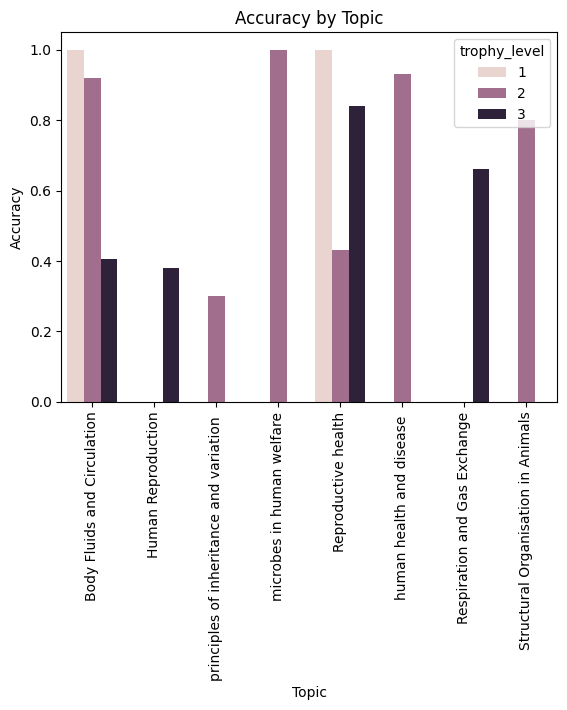

C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_5540\371035750.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='topic', y='initial_perf', hue = "trophy_level", color='orange',ci=None)
C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_5540\371035750.py:11: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.barplot(data=df, x='topic', y='initial_perf', hue = "trophy_level", color='orange',ci=None)


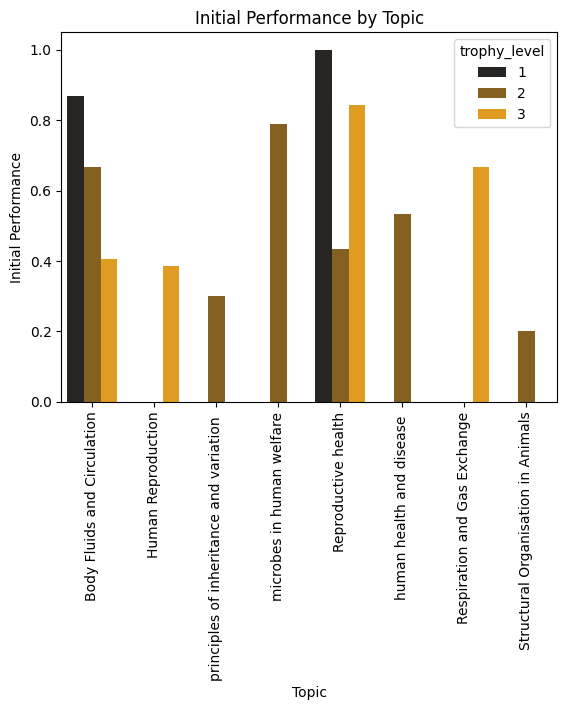

C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_5540\371035750.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='topic', y='improvement', hue = "trophy_level", color='red',ci=None)
C:\Users\Saya Sai Chandana\AppData\Local\Temp\ipykernel_5540\371035750.py:19: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data=df, x='topic', y='improvement', hue = "trophy_level", color='red',ci=None)


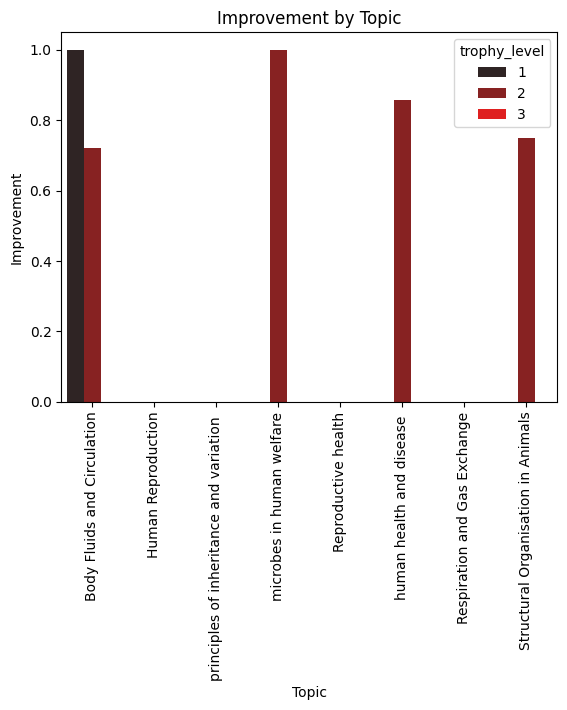

In [16]:
#Accuracy, initial_perf, improvement metrics are analysed based on the topic.
# Plot accuracy by topic
sns.barplot(data=df, x='topic', y='accuracy',hue = "trophy_level",ci=None)
plt.title("Accuracy by Topic")
plt.ylabel("Accuracy")
plt.xlabel("Topic")
plt.xticks(rotation=90)
plt.show()

# Plot initial performance by topic
sns.barplot(data=df, x='topic', y='initial_perf', hue = "trophy_level", color='orange',ci=None)
plt.title("Initial Performance by Topic")
plt.ylabel("Initial Performance")
plt.xlabel("Topic")
plt.xticks(rotation=90)
plt.show()

# Plot improvement by topic
sns.barplot(data=df, x='topic', y='improvement', hue = "trophy_level", color='red',ci=None)
plt.title("Improvement by Topic")
plt.ylabel("Improvement")
plt.xlabel("Topic")
plt.xticks(rotation=90)
plt.show()


In [17]:
# Group by trophy_level and calculate the mean of metrics
average_performance = df.groupby('trophy_level')[['accuracy', 'initial_perf', 'improvement']].mean()

# Reset the index for better readability
average_performance = average_performance.reset_index()

# Display the average performance for each trophy level
print("Average Performance by Trophy Level:")
print(average_performance)

Average Performance by Trophy Level:
   trophy_level  accuracy  initial_perf  improvement
0             1    1.0000      0.934783     1.000000
1             2    0.7775      0.532018     0.596726
2             3    0.5380      0.540746     0.000000


In [18]:
# Group by topic and calculate the mean of metrics
average_performance_topic = df.groupby('topic')[['accuracy', 'initial_perf', 'improvement']].mean()

# Reset the index for better readability
average_performance_topic = average_performance_topic.reset_index()

# Display the average performance for each topic
print("Average Performance by Topic:")
print(average_performance_topic)


Average Performance by Topic:
                                      topic  accuracy  initial_perf  \
0               Body Fluids and Circulation  0.761667      0.613318   
1                        Human Reproduction  0.380000      0.384615   
2                       Reproductive health  0.756667      0.758480   
3              Respiration and Gas Exchange  0.660000      0.666667   
4        Structural Organisation in Animals  0.800000      0.200000   
5                 human health and disease   0.930000      0.533333   
6                 microbes in human welfare  1.000000      0.789474   
7  principles of inheritance and variation   0.300000      0.300000   

   improvement  
0     0.527778  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.750000  
5     0.857143  
6     1.000000  
7     0.000000  


In [19]:
# Set the threshold for initial performance
threshold = 0.7

# Filter topics with initial performance above the threshold
above_threshold = average_performance_topic[average_performance_topic['initial_perf'] > threshold]

# Filter topics with initial performance below the threshold
below_threshold = average_performance_topic[average_performance_topic['initial_perf'] <= threshold]

# Display the results
print("Topics with Initial Performance Above Threshold:")
print(above_threshold)

print("\nTopics with Initial Performance Below or Equal to Threshold:")
print(below_threshold)

Topics with Initial Performance Above Threshold:
                       topic  accuracy  initial_perf  improvement
2        Reproductive health  0.756667      0.758480          0.0
6  microbes in human welfare  1.000000      0.789474          1.0

Topics with Initial Performance Below or Equal to Threshold:
                                      topic  accuracy  initial_perf  \
0               Body Fluids and Circulation  0.761667      0.613318   
1                        Human Reproduction  0.380000      0.384615   
3              Respiration and Gas Exchange  0.660000      0.666667   
4        Structural Organisation in Animals  0.800000      0.200000   
5                 human health and disease   0.930000      0.533333   
7  principles of inheritance and variation   0.300000      0.300000   

   improvement  
0     0.527778  
1     0.000000  
3     0.000000  
4     0.750000  
5     0.857143  
7     0.000000  


### **Summary of Feedback**

#### **Based on Trophy Levels:**
1. **Trophy Level 1**:
   - **Accuracy**: 100%, **Initial Performance**: 93.48%, **Improvement**: 100%.
   - The student performs exceptionally well at this level, showing confidence in the basics.
   - No immediate focus required for improvement at this level.

2. **Trophy Level 2**:
   - **Accuracy**: 77.75%, **Initial Performance**: 53.20%, **Improvement**: 59.67%.
   - Performance is moderate, with a good potential for improvement.
   - Recommend focusing more on this level to enhance overall performance.

3. **Trophy Level 3**:
   - **Accuracy**: 53.80%, **Initial Performance**: 54.07%, **Improvement**: 0%.
   - Performance is lower, and no improvement is observed.
   - Suggest focusing on Trophy Level 3 only after improving performance at Trophy Level 2.

**Recommendation**:
- Prioritize **Trophy Level 2** for improvement, and progress to Trophy Level 3 once mastery is achieved.

---

#### **Based on Topics:**

1. **Strong Topics (Initial Performance Above Threshold)**:
   - **Reproductive Health**:
     - **Accuracy**: 75.67%, **Initial Performance**: 75.85%, **Improvement**: 0%.
     - Good initial performance, but no improvement.
     - Focus on **Trophy Level 2 quizzes** for further refinement.
   - **Microbes in Human Welfare**:
     - **Accuracy**: 100%, **Initial Performance**: 78.95%, **Improvement**: 100%.
     - Excellent performance with significant improvement.
     - No immediate focus required.

2. **Weak Topics (Initial Performance Below or Equal to Threshold)**:
   - **Human Reproduction**:
     - **Accuracy**: 38%, **Initial Performance**: 38.46%, **Improvement**: 0%.
     - Very poor performance; focus on **Trophy Level 1 quizzes**.
   - **Principles of Inheritance and Variation**:
     - **Accuracy**: 30%, **Initial Performance**: 30%, **Improvement**: 0%.
     - Weak performance and no improvement. Focus on **Trophy Level 1 quizzes**.
   - **Respiration and Gas Exchange**:
     - **Accuracy**: 66%, **Initial Performance**: 66.67%, **Improvement**: 0%.
     - Fair initial performance, but no improvement. Recommend **Trophy Level 2 quizzes**.
   - **Structural Organisation in Animals**:
     - **Accuracy**: 80%, **Initial Performance**: 20%, **Improvement**: 75%.
     - Poor initial performance but significant improvement. Focus on **Trophy Level 2 quizzes**.
   - **Body Fluids and Circulation**:
     - **Accuracy**: 76.17%, **Initial Performance**: 61.33%, **Improvement**: 52.78%.
     - Good performance overall. Progress to **Trophy Level 3 quizzes**.
   - **Human Health and Disease**:
     - **Accuracy**: 93%, **Initial Performance**: 53.33%, **Improvement**: 85.71%.
     - Excellent improvement. Progress to **Trophy Level 3 quizzes**.

---

### **Actionable Recommendations:**

1. **Focus Areas**:
   - Strengthen weak topics like **Human Reproduction** and **Principles of Inheritance and Variation** using **Trophy Level 1 quizzes**.
   - For topics with poor initial performance but scope for improvement (**Respiration and Gas Exchange**, **Structural Organisation in Animals**), attempt **Trophy Level 2 quizzes**.

2. **Progression**:
   - For topics with good performance (**Body Fluids and Circulation**, **Human Health and Disease**), transition to **Trophy Level 3 quizzes** to reinforce advanced concepts.

3. **General Focus**:
   - Improve Trophy Level 2 performance before focusing heavily on Trophy Level 3 to build a strong foundation.
